```{contents}
:depth: 4
```

# Ejercicios de funciones y gráficas

**Ejercicio 16:**


Escribe una rutina tal que

- **Entrada:** entero $n$ 

- **Salida:** número de condición en norma euclidiana de la matriz de Hilbert de orden $n$ 

matriz de Hilbert $H_n$ dada por

$$h_{i,j} = \dfrac{1}{i+j-1}\quad i,j=1,\dots,n$$

In [1]:
using LinearAlgebra # paquete requerido
using MatrixDepot # depósito de matrices

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


In [2]:
?MatrixDepot

search: MatrixDepot matrixdepot



julia     MatrixDepot

Give access to a wealth of sample and test matrices and accompanying data. A set of matrices is generated locally (with arguments controlling the special case). Another set is loaded from one of the publicly accessible matrix collections `SuiteSparse Matrix Collection` (formerly `University of Florida Matrix Collection`) and the `Matrix Market Collection`.

Access is like

```
using MatrixDepot

A = matrixdepot("hilb", 10) # locally generated hilbert matrix dimensions (10,10)

A = matrixdepot("HB/1138_bus")     # named matrix of the SuiteSparse Collection
A = matrixdepot(sp(1))             # same matrix using numerical id
A = matrixdepot("Harwell*/*/1138_bus") # matrix from the Matrix Market Collection 

md = mdopen("*/bfly")   # named matrix with some extra data
A = md.A
co = md.coord
tx = md("Gname_10.txt")

md = mdopen("gravity", 10, false) # localy generated example with rhs and solution
A = md.A
b = md.b
x = md.x
```

###### commands:

```
mdinfo, listdir, listgroups, matrixdepot, mdopen, listdata, mdlist,
metasymbols, @addgroup, @modifygroup, @rmgroup.
```

###### selector patterns:

```
strings, string-patterns (using "*", "?", "/", "**"), regular expressions: for names
builtin(42), user(3,5), sp(10:11,6,2833), mm(1): to access by integer id
```

###### predicate patterns:

```
isboolean, isinteger, isreal, iscomplex
isgeneral, issymmetric, ishermitian, isskew
isbuiltin, isuser, islocal, isremote, isloaded, isunloaded
keyword(string expression), logical, hasdata(symbol), @pred(expression)

see also: "logical" for logical combinations of all kinds of patterns.
```


In [3]:
A = matrixdepot("hilb", 3)

3×3 Array{Float64,2}:
 1.0       0.5       0.333333
 0.5       0.333333  0.25    
 0.333333  0.25      0.2     

In [12]:
function CondicionHilbert(n::Int64)
    #=
    Entrada: entero 𝑛

    Salida: número de condición en norma euclidiana de la matriz de Hilbert de orden 𝑛
    =#
    H = matrixdepot("hilb", n) 
    return cond(H,2)
end

CondicionHilbert (generic function with 1 method)

In [13]:
CondicionHilbert(10)

1.6024859712306152e13

In [14]:
?CondicionHilbert

search: CondicionHilbert



No documentation found.

`CondicionHilbert` is a `Function`.

```
# 1 method for generic function "CondicionHilbert":
[1] CondicionHilbert(n::Int64) in Main at In[12]:7
```


**Ejercicio 17:**

Usa la rutina anterior para mostrar la gráfica de los puntos $(n,\text{cond}(H_n))$ para $n=1,\dots,20$

In [15]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [19]:
N=1:20
y=CondicionHilbert.(N);

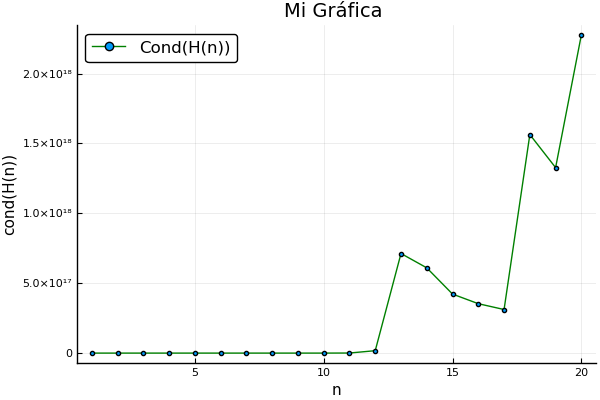

In [22]:
plot(N,y,
    # etiquetas para los ejes
    xlabel = "n", ylabel = "cond(H(n))",  
    # forma del punto y su tamaño
    markershape = :circle, markersize = 3 ,
    # color de la línea
    linecolor = :green,
    # etiqueta de la curva, su tamaño de letra y su posición
    label = "Cond(H(n))", legendfont=12,  
    # titulo y tamaño de letra
    title = "Mi Gráfica ", titlefont=14 )

**Composición de Funciones en Julia. EJEMPLO**

In [23]:
function  simetrica(A::Array{Float64},a::Number) 
    #=
    Entrada: matriz de flotantes A
             número a
            
    Salida: matrices simétricas Aₗ y Aᵤ
    
    Aₗ = Sₗ+ aI, Sₗ se obtiene al reflejar la triangular inferior de la matriz 
    Aᵤ = Sᵤ+ aI, Sᵤ se obtiene al reflejar la triangular superior de la matriz
    =#
    Sₗ = Float64.(Symmetric(A, :L)) 
    Sᵤ = Float64.(Symmetric(A, :U))
    Aₗ = Sₗ + a*I
    Aᵤ = Sᵤ + a*I
    return Aₗ, Aᵤ
end

simetrica (generic function with 1 method)

In [24]:
function prueba_chol(Aₗ::Array{Float64}, Aᵤ::Array{Float64})
    #=
      Entrada: matrices simétricas  Sₗ y Sᵤ
      Salida: matriz triangular inferior L de la Factorización de Cholesky de Sₗ
              matriz triangular superior U de la Factorización de Cholesky de Sᵤ
      en caso de que la matriz no sea positiva definida, regresa la parte triangular
      correspondiente  
    =#
    if isposdef(Aₗ)
        L = cholesky(Aₗ).L
    else
        println("Aₗ no es positiva definida\nte regreso la parte triangular inferior L")
        L = LowerTriangular(Aₗ)
    end
    if isposdef(Aᵤ)
        U = cholesky(Aᵤ).U
    else
        println("Aᵤ no es positiva definida\nte regreso la parte triangular superior U") 
        U = UpperTriangular(Aᵤ)
    end
    return L, U
end

prueba_chol (generic function with 1 method)

In [25]:
A = rand(5,5)

5×5 Array{Float64,2}:
 0.561756   0.070477  0.622058  0.414648   0.757868
 0.772081   0.206144  0.615455  0.224505   0.555453
 0.749207   0.516067  0.748591  0.289905   0.543176
 0.0888231  0.673667  0.185403  0.492077   0.805031
 0.287426   0.357406  0.634074  0.0207097  0.792546

In [26]:
a = 0; # primero prueba con 0 y luego cambia este valor a 1 

<font color=blue>usa `...` para pasar la salida de la 1ra rutina a la entrada de la 2da rutina
</font>    

In [31]:
L,U  = prueba_chol(simetrica(A,2)...);

In [29]:
typeof(simetrica(A,a))

Tuple{Array{Float64,2},Array{Float64,2}}

In [33]:
U

5×5 UpperTriangular{Float64,Array{Float64,2}}:
 1.60055  0.044033  0.388653  0.259066   0.473505
  ⋅       1.48466   0.403017  0.143534   0.360085
  ⋅        ⋅        1.56049   0.0841865  0.137153
  ⋅        ⋅         ⋅        1.54831    0.399875
  ⋅        ⋅         ⋅         ⋅         1.50332 

In [ ]:
Aₗ, Aᵤ = simetrica(A,a)
Aₗ

In [ ]:
L

**Ejercicio 18:**

Sean 
  
>  $f_p(x)=\|x\|_p:\mathbb R^2\to \mathbb R$

>  $G_\sigma(r)=\exp(-\sigma\cdot r^2):\mathbb R\to \mathbb R$

Crea una rutina 

- Entrada: números $p\geq 1,\sigma>0$
- Si $p$ y $\sigma$ cumplen las restricciones,  debe graficar cuatro curvas de nivel de

  $$\phi(x)= (G_\sigma\circ f_p)(x)$$
  
  En caso contrario, muestra un aviso 

Prueba tu rutina con
1. $p=1$ y $\sigma=-1$
2. $p=2$ y $\sigma=1$
3. $p=1$ y $\sigma=2$


In [ ]:
using PGFPlotsX
using Contour

**Ejercicio 19:**

Crea una rutina ***cuadrática*** para la función

$$f(x)= x^TAx + b^Tx:\mathbb R^2\to\mathbb R$$

Entrada: 
  - matriz $A$ 
  - vector $b$
 
Salida:
 
  - función $f$ que realiza la evaluación de la cuadrática
    
    recibe arreglo $x$
    
    devuelve valor de la evalución

Prueba tu rutina con

- una matriz simétrica $A$ de tamaño $2\times2$

- el vector $b=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$

- el vector $x=\begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix}$

Gráfica la supercifie de $f$ en $\quad -10\leq x_1\leq 10,\ -10\leq x_2\leq 10$

In [ ]:
using Plots; pyplot()

**Ejercicio 20:**

Crea rutina ***linea*** para la evaluación de la recta
 
> $p +\alpha d,\quad \alpha\in\mathbb R$

Entrada
- arreglos $p,d$ de dos componentes

Salida
- función $L$ que realiza la evaluación de la recta
  
  recibe número $\alpha$
  
  devuelve el arreglo $p +\alpha d$

Prueba tu rutina con

- la dirección $d$ un vector aleatorio de 2 componentes 

- el vector $p=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$

- $\alpha=-1$

Usa la función $f$ del ejercicio 4 para graficar
 
 $$\phi(\alpha)=f(p +\alpha d), \quad -0\leq\alpha\leq 10$$